In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
N = 10**6

In [116]:
ip = np.random.randn(N) > 0

In [117]:
s = 2 * ip - 1

In [118]:
eb_no_db = np.arange(5,30)

In [119]:
bit_error_ZF = np.zeros(len(eb_no_db))
bit_error_MMSE = np.zeros(len(eb_no_db))

In [120]:
def ZF():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y = (1/np.sqrt(2)) * np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for zero forcing
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            H_hermitian_times_H = np.dot(H_hermitian,H)
            
            H_hermitian_times_H_inverse = np.linalg.pinv(H_hermitian_times_H)
            
            W = np.dot(H_hermitian_times_H_inverse,H_hermitian)
            
            x_hat = np.dot(W,y)
            
            received_bits = x_hat > 0
            
            m = received_bits[0,0]
            
            n = received_bits[1,0]
            
            equalize_bits.append(m)
            
            equalize_bits.append(n)
            
        nErr = np.sum(ip != equalize_bits)
        
       
        
        bit_error_ZF[jj] = nErr/ N
        
        
        
    return bit_error_ZF    
            
    

In [121]:
def MMSE():
    
    for jj in range(len(eb_no_db)):
        nErr = 0
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y = (1/np.sqrt(2)) * np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for MMSE
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            H_hermitian_times_H = np.dot(H_hermitian,H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_hermitian_times_H_inverse = np.linalg.inv(H_hermitian_times_H + identity_matrix * snr_inverse)
            
            W = np.dot(H_hermitian_times_H_inverse,H_hermitian)
            
            x_hat = np.dot(W,y)
            
            received_bits = x_hat > 0
            
            m = received_bits[0,0]
            
            n = received_bits[1,0]
            
            equalize_bits.append(m)
            
            equalize_bits.append(n)
            
        nErr = np.sum(ip != equalize_bits)
        
       
        
        bit_error_MMSE[jj] = nErr/ N
        
        
        
    return bit_error_MMSE 
    

[0.091454 0.076227 0.063247 0.051459 0.042037 0.034146 0.027481 0.022349
 0.017725 0.01433  0.011451 0.009015 0.007194 0.005893 0.004604 0.003736
 0.002963 0.002283 0.001856 0.001421 0.001132 0.000943 0.000743 0.000579
 0.000423]
[0.058914 0.047761 0.038358 0.031227 0.024943 0.019548 0.01569  0.012576
 0.009932 0.007826 0.006172 0.004915 0.003869 0.003115 0.002456 0.001961
 0.001602 0.001229 0.001001 0.000763 0.000595 0.000527 0.000419 0.000314
 0.000238]


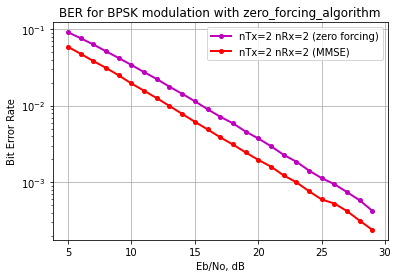

In [122]:
zero_forcing = ZF()
mmse = MMSE()
print(zero_forcing)
print(mmse)
plt.figure()
plt.semilogy(eb_no_db, zero_forcing, 'mo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero forcing)')
plt.semilogy(eb_no_db, mmse, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with ZF & MMSE algorithm')
plt.show()